In [77]:
import SimpleITK as sitk
def hu_transform(img):
    window_level = -600
    window_width = 1500

    # Apply the windowing filter
    window_filter = sitk.IntensityWindowingImageFilter()
    window_filter.SetWindowMinimum(window_level - window_width/2.0)
    window_filter.SetWindowMaximum(window_level + window_width/2.0)
    window_filter.SetOutputMinimum(0)
    window_filter.SetOutputMaximum(255)
    image_windowed = window_filter.Execute(img)
    return image_windowed
# Load your 3D volume (replace 'your_volume.nii' with the actual file path)
volume = sitk.ReadImage('D:/fin_de_etude/data/dataset_2d/nodule/100.170.mhd')

# Define the desired slice thickness (2.5 cm)


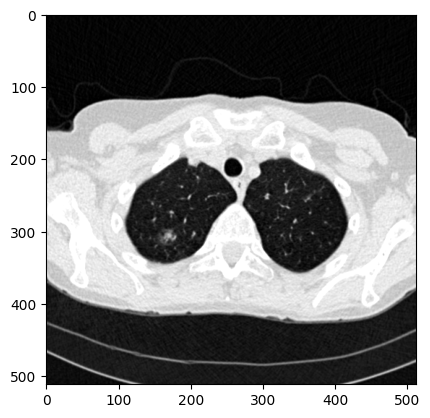

In [78]:
import matplotlib.pyplot as plt

img = sitk.GetArrayFromImage(volume)
plt.imshow(img,cmap="gray")
    

In [79]:
from skimage import measure
import cv2
import numpy as np
def get_coord(mask, image):
        # Find contours in the mask
        response = []
       
                
        contours = measure.find_contours(mask.reshape((512, 512)), 0.85)

                # Set default values
        x = None
        y= None
        c = []
        center=[]
        diameter = []

                # Loop through the contours and extract the circle properties
        for cnt in contours:
                # Convert the contour to integer format
                cnt = np.array(cnt, dtype=np.float32)

                        # Fit a circle to the contour using the minimum enclosing circle method
                (x, y), radius = cv2.minEnclosingCircle(cnt)
                center.append((x,y))
                diameter.append(radius * 2)
                        
                        # Print the circle properties
                if x is not None and y is not None:
                                
                        c = [image.TransformContinuousIndexToPhysicalPoint((x, y))for x,y in center]
                        pixel_size = image.GetSpacing()[0]
                        diameter = [d *pixel_size for d in diameter]
                       
                        res =  center,radius,c     
                else:
                                
                        res = None, None,None
                response.append(res)
        return response

In [80]:
import tensorflow as tf
slice_array = img/255
deeplab = tf.keras.models.load_model("deeplabv3plus.h5",compile=False)
mask = deeplab.predict(slice_array.reshape((1,512,512,1)),batch_size=2)
mask = np.where(mask>0.5,1,0)


1/1 [==============================] - 0s 256ms/step


In [81]:
corrd = get_coord(mask,volume)

In [82]:
for c in corrd:
    print(c)

([(308.5, 167.5)], 8.875482559204102, [(19.019528124999994, -219.84375312499998)])


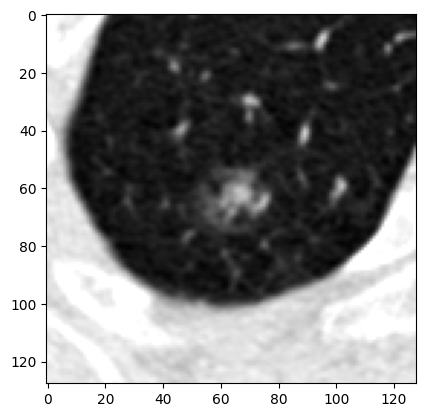

In [83]:
nodule = img[308-64:308+64,167-64:167+64]
plt.imshow(nodule,cmap='gray')

In [84]:
image = sitk.ReadImage('D:/fin_de_etude/data/subset3/1.3.6.1.4.1.14519.5.2.1.6279.6001.202187810895588720702176009630.mhd')
point_idx = image.TransformContinuousIndexToPhysicalPoint((100.70982442666666,184.55452354844445,121.0))

In [85]:
print(point_idx)

(-126.8884017, -63.735100630000005, -198.01001000000002)


In [70]:
point_idx[1]

184.55452354844445